# Netflix Data Analysis

### *Author:* Grady Cooke
### *Date:* June 7, 2025


## Summary

This notebook explores patterns and trends in a dataset of Netflix titles. Using Python and libraries such as pandas, seaborn, and matplotlib, the analysis investigates:

        Durations across genres and decades

        Genre preferences by country

        Data distribution visualizations and summary statistics

The goal is to apply core data analysis skills, such as grouping, filtering, visualizing, and interpreting data, in a real-world context.

## Dataset Overview

In [4]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [5]:
# Let's check out what the data looks like

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [7]:
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
count,4812,4812,4812,4812,4812,4812,4812,4812.000000,4812.000000,4812,4812
unique,4812,2,4812,3615,4690,72,1292,NaN,NaN,4807,31
top,s2,Movie,7:19,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",NaN,NaN,A scheming matriarch plots to cut off her disa...,Dramas
freq,1,4677,1,18,10,1886,100,NaN,NaN,2,1343
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.711554,99.566708,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.517978,30.889305,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,88.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,99.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,116.000000,NaN,NaN


In [8]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

So, the data contains 4,812 entries and 11 columns. All columns are complete with no missing values.

## Titles from the 1990s

First, I want to evaluate the duration of titles from the 1990s

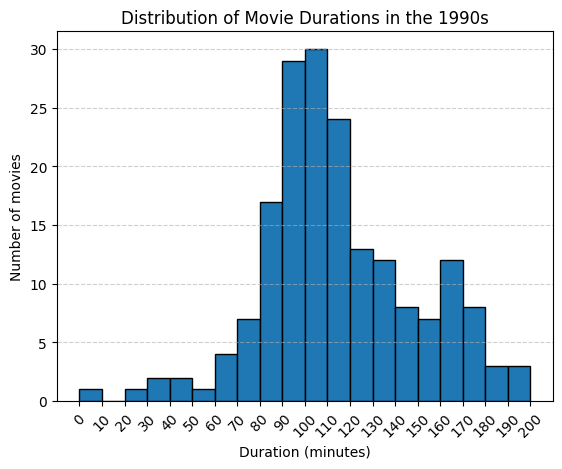

In [12]:
# Subset movies from the 1990s
netflix_df_1990s = netflix_df[(netflix_df["release_year"] > 1989) & (netflix_df["release_year"] < 2000)]

# Determine the most frequent movie duration via a histogram, intervals of 10 minutes

plt.hist(netflix_df_1990s["duration"],bins=range(0,210,10),edgecolor="black")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of movies")
plt.title("Distribution of Movie Durations in the 1990s")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(0, 210, 10),rotation=45)  
plt.show()

So, the duration of most movies from the 1990s falls between 100 and 110 minutes.

In [14]:
# What is the most frequent duration of movies from the 1990s down to the minute?

duration = int(netflix_df_1990s["duration"].mode()[0])
print(duration)

94


Even though most movies from the 1990s fall between 100 and 110 minutes, the most common movie duration to the minute is 94 minutes.

Next, I want to count the number of short action movies from the 1990s.

In [16]:
# Subset by genre
netflix_1990s_action = netflix_df_1990s[netflix_df_1990s["genre"] == "Action"]
netflix_1990s_action.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
352,s508,Movie,Andaz Apna Apna,Rajkumar Santoshi,"Aamir Khan, Salman Khan, Raveena Tandon, Karis...",India,"May 11, 2020",1994,160,Broke and with no concrete plans for the futur...,Action
431,s628,Movie,Austin Powers: The Spy Who Shagged Me,Jay Roach,"Mike Myers, Heather Graham, Michael York, Robe...",United States,"December 1, 2019",1999,95,When diabolical genius Dr. Evil travels back i...,Action
468,s688,Movie,Bad Boys,Michael Bay,"Will Smith, Martin Lawrence, Téa Leoni, Tchéky...",United States,"October 1, 2019",1995,119,"In this fast-paced actioner, two Miami narcoti...",Action
515,s757,Movie,Barsaat,Rajkumar Santoshi,"Twinkle Khanna, Bobby Deol, Danny Denzongpa, R...",India,"April 1, 2018",1995,166,A naïve young man and a rich city girl fall in...,Action
675,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...",Germany,"January 1, 2021",1999,94,A jewel thief returns to his hiding place afte...,Action
815,s1236,Movie,Casino Tycoon,Wong Jing,Wong Jing,Hong Kong,"August 1, 2018",1992,125,"When Japanese troops invade Hong Kong, young B...",Action
816,s1237,Movie,Casino Tycoon 2,Wong Jing,Dennis Chan,Hong Kong,"August 16, 2018",1992,108,Casino mogul Benny Ho wields enormous power. B...,Action
1018,s1605,Movie,Dante's Peak,Roger Donaldson,"Pierce Brosnan, Linda Hamilton, Elizabeth Hoff...",United States,"September 1, 2019",1997,108,When a volcanologist comes to investigate the ...,Action
1179,s1850,Movie,Dragonheart,Rob Cohen,"Sean Connery, Dennis Quaid, David Thewlis, Pet...",United States,"January 1, 2020",1996,103,In ancient times when majestic fire-breathers ...,Action
1288,s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathet...",Action


In [17]:
# Count the number of short action movies from the 1990s using a for loop. A short movie is less than 90 minutes

short_movie_count = 0

for label, row in netflix_1990s_action.iterrows():
    if row["duration"] < 90:
        short_movie_count += 1

print(short_movie_count)

7


In [18]:
# So, what are these 7 movies?

netflix_1990s_action_short = netflix_1990s_action[netflix_1990s_action["duration"] < 90]
columns_of_interest = ["title", "director", "country", "release_year", "duration", "genre"]
netflix_1990s_action_short[columns_of_interest].sort_values(by="duration")

,title,director,country,release_year,duration,genre
1288,EVANGELION: DEATH (TRUE)²,Hideaki Anno,Japan,1998,69,Action
3806,The Bare-Footed Kid,Johnnie To,Hong Kong,1993,83,Action
2993,Passenger 57,Kevin Hooks,United States,1992,84,Action
3943,The End of Evangelion,"Hideaki Anno, Kazuya Tsurumaki",Japan,1997,87,Action
2328,"Look Out, Officer",Sze Yu Lau,Hong Kong,1990,88,Action
1698,Hero,Corey Yuen,Hong Kong,1997,89,Action
3297,Rumble in the Bronx,Stanley Tong,Hong Kong,1995,89,Action


So, there are 7 action movies from the 1990s with a duration less than 90 minutes, with EVANGELION: DEATH having the shortest duration of 69 minutes.

## Exploring Genre, Duration, and Release Year

I will evaluate if there are any interesting relationships between variables.

In [22]:
# First, I will calculate the correlation coefficient between release year and duration

corr_value = netflix_df[["release_year", "duration"]].corr().iloc[0, 1]
print(f"The correlation between release year and duration is {corr_value:.2f}")

The correlation between release year and duration is -0.22


It appears releases have gotten slightly shorter an average over time. Does a scatter plot confirm this?

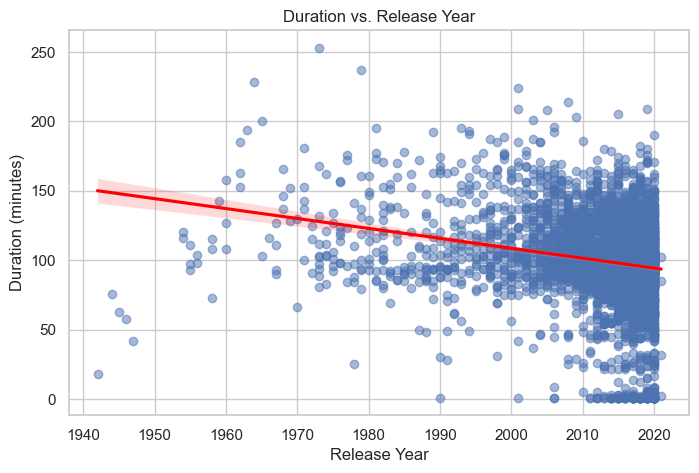

In [24]:
# To better evaluate this relationship, I will plot duration over time

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.regplot(
    data=netflix_df,
    x="release_year",
    y="duration",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"}
)
plt.title("Duration vs. Release Year")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.show()

The scatter plot with a regression line confirms a slight negative correlation between release year and duration. So, on average, movies have become shorter over time. It appears that this is because Netflix has added a large number of releases with particularly short durations in recent years, likely being TV shows or short documentaries.

Next, I want to evaluate the relationship between genre and duration

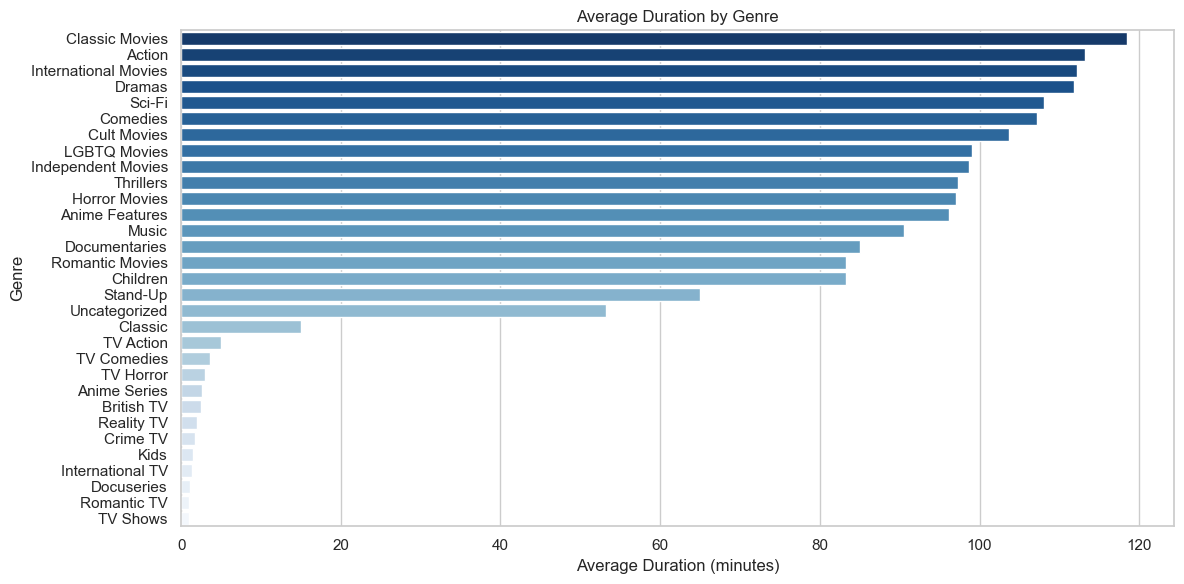

In [26]:
# Group by genre and compute average duration
genre_duration = netflix_df.groupby("genre")["duration"].mean().reset_index()

# Sort genres by average duration
genre_duration_sorted = genre_duration.sort_values(by="duration", ascending=False)


plt.figure(figsize=(12, 6))

sns.barplot(
    data=genre_duration_sorted,
    x="duration",
    y="genre",
    hue="genre",                      
    palette="Blues_r",
    dodge=False,      # avoid splitting bars by hue
    legend=False      
)

plt.title("Average Duration by Genre")
plt.xlabel("Average Duration (minutes)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

The bar chart displays the average movie duration for each genre in the Netflix dataset. Genres are sorted in descending order by their average duration. The chart reveals that genres like Classic Movies, Action, and International Movies tend to have the longest average runtimes, while genres such as TV Shows, Romantic TV, and Docuseries generally have the shortest.

Finally, I will explore the most popular genres from each country.

In [28]:
# Count genres by country
country_genre_counts = netflix_df.groupby(["country", "genre"]).size().reset_index(name="count")

# Get top genre per country
top_genre_by_country = country_genre_counts.sort_values("count", ascending=False)\
    .drop_duplicates(subset="country").reset_index(drop=True)

# Display a few
top_genre_by_country.sort_values("count", ascending=False).head(20)

,country,genre,count
0,India,Dramas,378
1,United States,Dramas,374
2,United Kingdom,Dramas,77
3,Egypt,Comedies,50
4,Turkey,Comedies,50
5,Hong Kong,Action,49
6,France,Dramas,48
7,Japan,Action,42
8,Indonesia,Dramas,41
9,Spain,Dramas,40


It appears that Dramas are the most common genre for many countries. Does a bar plot confirm this?

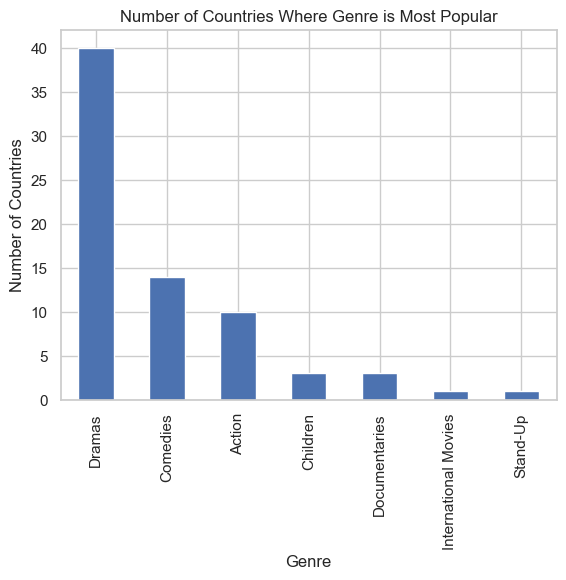

In [30]:
# Creating a bar plot of the number of countries where a genre is the most common

genre_global_counts = top_genre_by_country["genre"].value_counts()
genre_global_counts.plot(kind="bar", title="Number of Countries Where Genre is Most Popular")
plt.xlabel("Genre")
plt.ylabel("Number of Countries")
plt.show()

Indeed, dramas are the most common genre for many countries.

## Conclusion

This analysis examined patterns in the Netflix dataset, focusing on movie durations, genre distributions, and country-level preferences. The most common movie length in the 1990s was approximately 94 minutes, and we observed a modest decline in average duration over time.

Genres such as Classic Movies and Action consistently showed longer average runtimes, while TV-related genres were much shorter. Drama emerged as the most dominant genre across several countries, particularly in India and the U.S.

These insights could support content planning, recommendation systems, or further comparative studies with global viewing trends. Future analyses might explore text features like plot descriptions or perform sentiment analysis for deeper content evaluation.